In [1]:
#Q2-part1: How many times did the winning team score first in games vs non-wining teams?

In [4]:
import pandas as pd
import numpy as np

In [5]:
tournament_data= pd.read_csv('tournaments.csv')
goals_data= pd.read_csv('goals.csv')

In [6]:

#tournament_data.loc[ tournament_data['winner']== "West Germany", 'winner' ] = 'Germany'
tournament_data

,key_id,tournament_id,tournament_name,year,start_date,end_date,host_country,winner,host_won,count_teams,group_stage,second_group_stage,final_round,round_of_16,quarter_finals,semi_finals,third_place_match,final
0,1,WC-1930,1930 FIFA World Cup,1930,1930-07-13,1930-07-30,Uruguay,Uruguay,1,13,1,0,0,0,0,1,0,1
1,2,WC-1934,1934 FIFA World Cup,1934,1934-05-27,1934-06-10,Italy,Italy,1,16,0,0,0,1,1,1,1,1
2,3,WC-1938,1938 FIFA World Cup,1938,1938-06-04,1938-06-19,France,Italy,0,15,0,0,0,1,1,1,1,1
3,4,WC-1950,1950 FIFA World Cup,1950,1950-06-24,1950-07-16,Brazil,Uruguay,0,13,1,0,1,0,0,0,0,0
4,5,WC-1954,1954 FIFA World Cup,1954,1954-06-16,1954-07-04,Switzerland,West Germany,0,16,1,0,0,0,1,1,1,1
5,6,WC-1958,1958 FIFA World Cup,1958,1958-06-08,1958-06-29,Sweden,Brazil,0,16,1,0,0,0,1,1,1,1
6,7,WC-1962,1962 FIFA World Cup,1962,1962-05-30,1962-07-17,Chile,Brazil,0,16,1,0,0,0,1,1,1,1
7,8,WC-1966,1966 FIFA World Cup,1966,1966-07-11,1966-07-30,England,England,1,16,1,0,0,0,1,1,1,1
8,9,WC-1970,1970 FIFA World Cup,1970,1970-05-31,1970-06-21,Mexico,Brazil,0,16,1,0,0,0,1,1,1,1
9,10,WC-1974,1974 FIFA World Cup,1974,1974-06-13,1974-07-07,West Germany,West Germany,1,16,1,1,0,0,0,0,1,1


In [7]:
tournament_data=tournament_data.rename(columns={'winner': 'first_goal_country'})
#tournament_data

In [8]:
goals_data['team1']=goals_data['match_name'].apply( lambda x: x.split(' v ')[0])
goals_data['team2']=goals_data['match_name'].apply( lambda x: x.split(' v ')[1])
#goals_data.head(15)


In [9]:
pd.set_option( 'display.max_columns', None )
goals_data.head()

,key_id,goal_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,group_name,team_id,team_name,team_code,home_team,away_team,player_id,family_name,given_name,shirt_number,player_team_id,player_team_name,player_team_code,minute_label,minute_regulation,minute_stoppage,match_period,own_goal,penalty,team1,team2
0,1,G-0001,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-09831,Laurent,Lucien,0,T-28,France,FRA,19',19,0,first half,0,0,France,Mexico
1,2,G-0002,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-05670,Langiller,Marcel,0,T-28,France,FRA,40',40,0,first half,0,0,France,Mexico
2,3,G-0003,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-07295,Maschinot,André,0,T-28,France,FRA,43',43,0,first half,0,0,France,Mexico
3,4,G-0004,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-07295,Maschinot,André,0,T-28,France,FRA,87',87,0,second half,0,0,France,Mexico
4,5,G-0005,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-44,Mexico,MEX,0,1,P-03952,Carreño,Juan,0,T-44,Mexico,MEX,70',70,0,second half,0,0,France,Mexico


In [10]:
team1_first_goal_info=goals_data.groupby( [ 'tournament_id', 'match_id', 'team_name' ] ).agg( {'minute_regulation': 'min'} ).reset_index()
team1_first_goal_info=team1_first_goal_info.rename(columns={'team_name': 'team1', 'minute_regulation': 'team1_first_goal_minute'})
#team1_first_goal_info


In [11]:
goals_data = goals_data.merge( team1_first_goal_info, on=["tournament_id", "match_id", 'team1'], how='left' )
#goals_data.head(15)

In [12]:
goals_data = goals_data.rename( columns={ 'first_goal_minute': 'team1_first_goal_minute' } )
#goals_data.head() 

In [13]:
team2_first_goal_info=goals_data.groupby( [ 'tournament_id', 'match_id', 'team_name' ] ).agg( {'minute_regulation': 'min'} ).reset_index()
team2_first_goal_info=team2_first_goal_info.rename(columns={'team_name': 'team2', 'minute_regulation': 'team2_first_goal_minute'})
team2_first_goal_info.head() 


,tournament_id,match_id,team2,team2_first_goal_minute
0,WC-1930,M-1930-01,France,19
1,WC-1930,M-1930-01,Mexico,70
2,WC-1930,M-1930-02,United States,23
3,WC-1930,M-1930-03,Brazil,62
4,WC-1930,M-1930-03,Yugoslavia,21


In [14]:
goals_data = goals_data.merge( team2_first_goal_info, on=["tournament_id", "match_id", 'team2'], how='left' )
goals_data.head()

,key_id,goal_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,group_name,team_id,team_name,team_code,home_team,away_team,player_id,family_name,given_name,shirt_number,player_team_id,player_team_name,player_team_code,minute_label,minute_regulation,minute_stoppage,match_period,own_goal,penalty,team1,team2,team1_first_goal_minute,team2_first_goal_minute
0,1,G-0001,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-09831,Laurent,Lucien,0,T-28,France,FRA,19',19,0,first half,0,0,France,Mexico,19.0,70.0
1,2,G-0002,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-05670,Langiller,Marcel,0,T-28,France,FRA,40',40,0,first half,0,0,France,Mexico,19.0,70.0
2,3,G-0003,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-07295,Maschinot,André,0,T-28,France,FRA,43',43,0,first half,0,0,France,Mexico,19.0,70.0
3,4,G-0004,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,France,FRA,1,0,P-07295,Maschinot,André,0,T-28,France,FRA,87',87,0,second half,0,0,France,Mexico,19.0,70.0
4,5,G-0005,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-44,Mexico,MEX,0,1,P-03952,Carreño,Juan,0,T-44,Mexico,MEX,70',70,0,second half,0,0,France,Mexico,19.0,70.0


In [15]:
#goals_data.head(15)

In [16]:
goals_data.loc[ goals_data['team1_first_goal_minute'].isnull(), 'team1_first_goal_minute' ] = 200
goals_data.loc[ goals_data['team2_first_goal_minute'].isnull(), 'team2_first_goal_minute' ] = 200

#goals_data.head(15)

In [17]:
goals_data = goals_data[ [ 'tournament_id', 'team_name','match_id', 'team1', 'team2', 'team1_first_goal_minute', 'team2_first_goal_minute' ] ].drop_duplicates()

#goals_data.head(15)


In [18]:
goals_data['first_goal_country'] = goals_data['team1']

goals_data.loc[ ( goals_data['team1_first_goal_minute'] > goals_data['team2_first_goal_minute'] ), 'first_goal_country' ] = goals_data.loc[ ( goals_data['team1_first_goal_minute'] > goals_data['team2_first_goal_minute'] ), 'team2' ]

goals_data.head(35)


,tournament_id,team_name,match_id,team1,team2,team1_first_goal_minute,team2_first_goal_minute,first_goal_country
0,WC-1930,France,M-1930-01,France,Mexico,19.0,70.0,France
4,WC-1930,Mexico,M-1930-01,France,Mexico,19.0,70.0,France
5,WC-1930,United States,M-1930-02,United States,Belgium,23.0,200.0,United States
8,WC-1930,Yugoslavia,M-1930-03,Yugoslavia,Brazil,21.0,62.0,Yugoslavia
10,WC-1930,Brazil,M-1930-03,Yugoslavia,Brazil,21.0,62.0,Yugoslavia
11,WC-1930,Romania,M-1930-04,Romania,Peru,1.0,75.0,Romania
14,WC-1930,Peru,M-1930-04,Romania,Peru,1.0,75.0,Romania
15,WC-1930,Argentina,M-1930-05,Argentina,France,81.0,200.0,Argentina
16,WC-1930,Chile,M-1930-06,Chile,Mexico,3.0,200.0,Chile
19,WC-1930,Yugoslavia,M-1930-07,Yugoslavia,Bolivia,60.0,200.0,Yugoslavia


In [19]:
pd.set_option('display.max_rows', None)
winner_firstgoal_info=pd.merge(tournament_data[['tournament_id', 'first_goal_country']], goals_data, how='inner', on= ['tournament_id', 'first_goal_country' ])
#winner_firstgoal_info


In [20]:
winner_firstgoal_info = winner_firstgoal_info.groupby( [ 'tournament_id', 'first_goal_country' ] ).count()['match_id'].reset_index()

winner_firstgoal_info = winner_firstgoal_info.rename(columns={ 'match_id': 'number_of_matches_winner_scored_first' })
winner_firstgoal_info

,tournament_id,first_goal_country,number_of_matches_winner_scored_first
0,WC-1930,Uruguay,4
1,WC-1934,Italy,4
2,WC-1938,Italy,8
3,WC-1950,Uruguay,3
4,WC-1954,West Germany,5
5,WC-1958,Brazil,5
6,WC-1962,Brazil,5
7,WC-1966,England,5
8,WC-1970,Brazil,7
9,WC-1974,West Germany,4


In [21]:
non_winner_firstgoal_info = goals_data.merge( tournament_data[ [ 'tournament_id', 'first_goal_country' ] ], \
                      how='outer', left_on=['tournament_id', 'first_goal_country'], \
                      right_on=['tournament_id', 'first_goal_country'], indicator=True )

non_winner_firstgoal_info = non_winner_firstgoal_info.loc[ non_winner_firstgoal_info['_merge'] == 'left_only' ]

#non_winner_firstgoal_info

In [22]:
non_winner_firstgoal_info = non_winner_firstgoal_info.groupby( [ 'tournament_id', 'first_goal_country' ] ).count()['match_id'].reset_index()

non_winner_firstgoal_info = non_winner_firstgoal_info.rename(columns={ 'match_id': 'number_of_matches_non_winner_scored_first' })
non_winner_firstgoal_info


,tournament_id,first_goal_country,number_of_matches_non_winner_scored_first
0,WC-1930,Argentina,7
1,WC-1930,Brazil,1
2,WC-1930,Chile,2
3,WC-1930,France,2
4,WC-1930,Paraguay,1
5,WC-1930,Romania,2
6,WC-1930,United States,2
7,WC-1930,Yugoslavia,5
8,WC-1934,Argentina,2
9,WC-1934,Austria,2


In [23]:
winner_firstgoal_info.describe()

,number_of_matches_winner_scored_first
count,21.000000
mean,6.619048
std,2.438774
min,3.000000
25%,5.000000
50%,6.000000
75%,8.000000
max,12.000000


In [24]:
non_winner_firstgoal_info.describe()

,number_of_matches_non_winner_scored_first
count,336.000000
mean,3.419643
std,2.036847
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,10.000000


In [25]:
#End of Data Transformation code
#Begin Visualization code

In [26]:
import matplotlib.pyplot as plt

In [27]:
#get non winner average to account for the count difference
non_winner_firstGoal_tourn_info = non_winner_firstgoal_info.groupby(['tournament_id']).agg( {'number_of_matches_non_winner_scored_first': 'mean'} ).reset_index()
non_winner_firstGoal_tourn_info.describe()

,number_of_matches_non_winner_scored_first
count,21.000000
mean,3.426266
std,0.405978
min,2.750000
25%,3.173913
50%,3.363636
75%,3.555556
max,4.400000


In [28]:
winner_firstgoal_info.head()
tournaments = winner_firstgoal_info["tournament_id"].values
winner_firstGoal_count = winner_firstgoal_info["number_of_matches_winner_scored_first"].values

nonwinner_firstGoal_count=non_winner_firstGoal_tourn_info["number_of_matches_non_winner_scored_first"].values

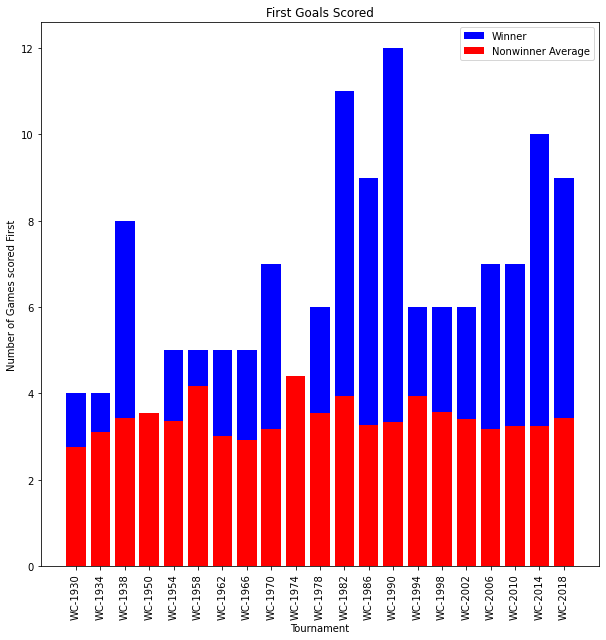

In [29]:
#graph build and display
plt.figure(figsize=(10,10))
plt.bar(tournaments , winner_firstGoal_count, color="b", label = "Winner")
plt.bar(tournaments , nonwinner_firstGoal_count, color="r", label="Nonwinner Average")
plt.xlabel('Tournament')
plt.ylabel('Number of Games scored First')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.title('First Goals Scored')
plt.show()

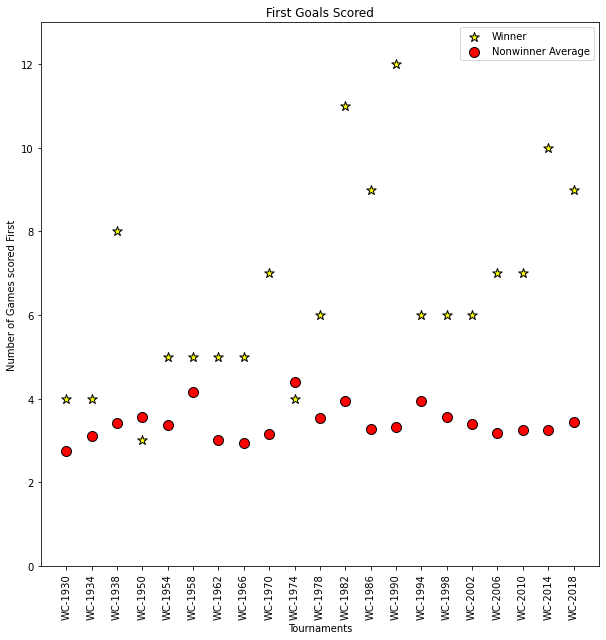

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(tournaments, winner_firstGoal_count , marker = "*",s =100, facecolors="yellow", edgecolors="black", label = "Winner")
plt.scatter(tournaments, nonwinner_firstGoal_count ,s =100, facecolors="red", edgecolors="black", label = "Nonwinner Average")
plt.ylim(0,13)
plt.xlabel("Tournaments")
plt.xticks(rotation=90)
plt.ylabel("Number of Games scored First")
plt.title("First Goals Scored")
plt.legend(loc='best')
plt.show()

In [31]:
from scipy import stats
stats.ttest_ind(winner_firstGoal_count,nonwinner_firstGoal_count)

Ttest_indResult(statistic=5.91795486415443, pvalue=6.164448464266307e-07)

In [32]:
stats.ttest_ind(winner_firstGoal_count,nonwinner_firstGoal_count, equal_var=False)

Ttest_indResult(statistic=5.917954864154428, pvalue=6.974384388739985e-06)